In [1]:
from src import data_catalog
from src import tseries_mod
from src.utils_plot import plot_1ds

%matplotlib inline

In [2]:
data_catalog.set_catalog('cesm_coupled')

active catalog: cesm_coupled


In [3]:
varnames = ['NBP', 'NEE', 'NEP']

In [4]:
experiment = 'historical'
ds_expr_ann = tseries_mod.tseries_get_vars(varnames, 'lnd', experiment, freq='ann')
# print(ds_expr_ann)

In [5]:
# load Dataset for corresponding parent_experiment
parent_experiment = data_catalog.find_in_index(experiment=experiment).parent_experiment.unique()[0]
print(parent_experiment)
ds_parent_ann = tseries_mod.tseries_get_vars(varnames, 'lnd', parent_experiment, freq='ann')
# print(ds_parent_ann)

piControl


In [6]:
# construct year range of parent_experiment to use for detrending
branch_years = data_catalog.find_in_index(experiment=experiment).parent_branch_year.unique()
yr_lo = branch_years.min() - 50
yyyymmdd_lo = f'{yr_lo:04d}-01-01'
yr_hi = branch_years.max() + 50 + len(ds_expr_ann.time)
yyyymmdd_hi = f'{yr_hi:04d}-01-01'
print((yyyymmdd_lo, yyyymmdd_hi))

('0451-01-01', '1086-01-01')


In [7]:
# compute parent_experiment mean, for detrending
ds_parent_ann_slice_mean = ds_parent_ann.sel(time=slice(yyyymmdd_lo, yyyymmdd_hi)).mean(dim='time')
for varname in varnames:
    print(ds_parent_ann_slice_mean[varname])

<xarray.DataArray 'NBP' (region: 6)>
array([-0.0243774 , -0.00183574, -0.00136958, -0.00137766, -0.00182463,
       -0.00024733], dtype=float32)
Coordinates:
  * region   (region) object 'Global' 'CentralAfrica' ... 'TropSAmer' 'SSAmer'
Attributes:
    long_name:     Integrated net biome production, includes fire, landuse, h...
    units:         Pg yr-1
    cell_methods:  time: mean
<xarray.DataArray 'NEE' (region: 6)>
array([-0.16675441, -0.01632737, -0.00386213,  0.00133657, -0.00423786,
       -0.0015105 ], dtype=float32)
Coordinates:
  * region   (region) object 'Global' 'CentralAfrica' ... 'TropSAmer' 'SSAmer'
Attributes:
    long_name:     Integrated net ecosystem exchange of carbon, includes fire...
    units:         Pg yr-1
    cell_methods:  time: mean
<xarray.DataArray 'NEP' (region: 6)>
array([1.6823286 , 0.31726483, 0.01611273, 0.10284875, 0.13042158,
       0.14784361], dtype=float32)
Coordinates:
  * region   (region) object 'Global' 'CentralAfrica' ... 'TropSAmer' 'SSA

In [8]:
ds_expr_ann_detrended = ds_expr_ann - ds_parent_ann_slice_mean

In [9]:
# add cummulate flux vars to datasets
# for ds in [ds_expr_ann, ds_expr_ann_detrended]:
for ds in [ds_expr_ann, ds_expr_ann_detrended]:
    for varname in varnames:
        da = ds[varname].cumsum(dim='time', keep_attrs=True)
        da.name = varname+'_CUM'
        da.attrs['units'] = 'Pg'
        ds[da.name] = da

# print(ds_expr_ann)
# print(ds_expr_ann_detrended)

array([1.5862049 , 0.30143383, 0.7016919 , 1.5392824 , 0.7782162 ,
       0.53285694, 2.3604856 , 0.89829767, 1.4477971 , 1.256076  ,
       1.635122  ], dtype=float32)

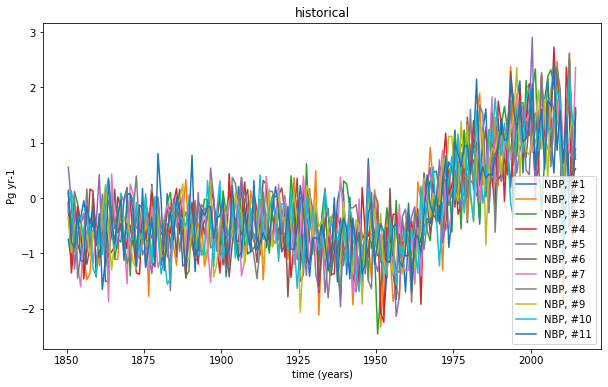

In [10]:
plot_1ds(ds_expr_ann, ['NBP'], title=experiment, region_val='Global')
ds_expr_ann['NBP'].sel(region='Global').isel(time=-1).values

array([-32.625477, -35.636967, -30.785646, -34.654255, -34.612293,
       -34.35539 , -28.816408, -30.566147, -30.697565, -33.113216,
       -29.177525], dtype=float32)

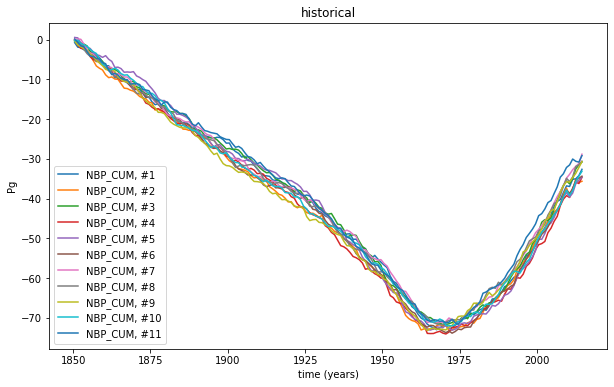

In [11]:
plot_1ds(ds_expr_ann, ['NBP_CUM'], title=experiment, region_val='Global')
ds_expr_ann['NBP_CUM'].sel(region='Global').isel(time=-1).values

array([-28.603182, -31.614693, -26.76337 , -30.631947, -30.590017,
       -30.333094, -24.794117, -26.543911, -26.675323, -29.090984,
       -25.15526 ], dtype=float32)

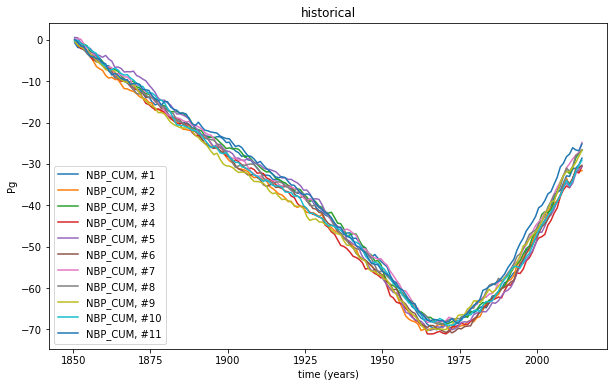

In [12]:
plot_1ds(ds_expr_ann_detrended, ['NBP_CUM'], title=experiment, region_val='Global')
ds_expr_ann_detrended['NBP_CUM'].sel(region='Global').isel(time=-1).values

array([-4.6877646, -3.2523012, -3.8417706, -4.677012 , -3.9195752,
       -3.7636516, -5.5795565, -3.9434552, -4.5547566, -4.396997 ,
       -4.702356 ], dtype=float32)

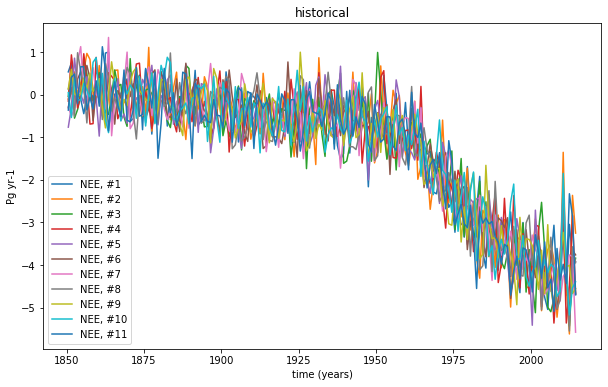

In [13]:
plot_1ds(ds_expr_ann, ['NEE'], title=experiment, region_val='Global')
ds_expr_ann['NEE'].sel(region='Global').isel(time=-1).values

array([-201.79475, -199.37599, -203.59848, -200.55246, -200.16512,
       -200.9267 , -203.9993 , -204.21391, -203.15887, -200.52507,
       -204.5346 ], dtype=float32)

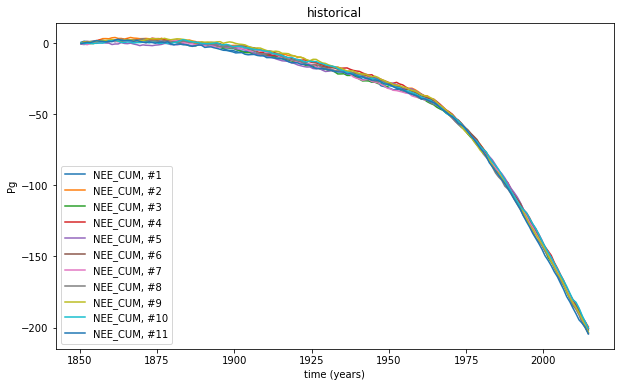

In [14]:
plot_1ds(ds_expr_ann, ['NEE_CUM'], title=experiment, region_val='Global')
ds_expr_ann['NEE_CUM'].sel(region='Global').isel(time=-1).values

array([-174.28029, -171.86151, -176.08397, -173.03795, -172.65062,
       -173.41219, -176.48482, -176.69942, -175.64441, -173.01054,
       -177.02013], dtype=float32)

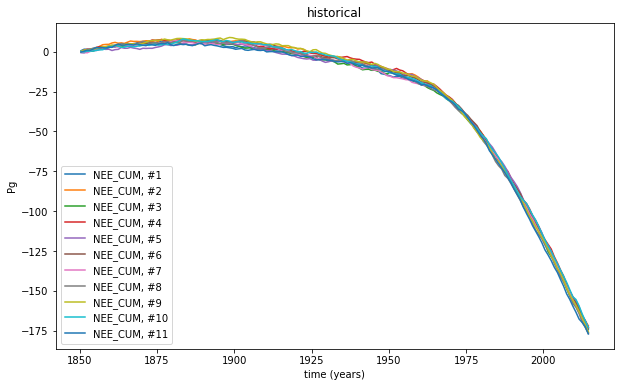

In [15]:
plot_1ds(ds_expr_ann_detrended, ['NEE_CUM'], title=experiment, region_val='Global')
ds_expr_ann_detrended['NEE_CUM'].sel(region='Global').isel(time=-1).values

array([7.211116 , 5.774153 , 6.190781 , 7.140012 , 6.5254564, 6.4120426,
       7.953297 , 6.4072266, 6.8109016, 6.940264 , 7.287217 ],
      dtype=float32)

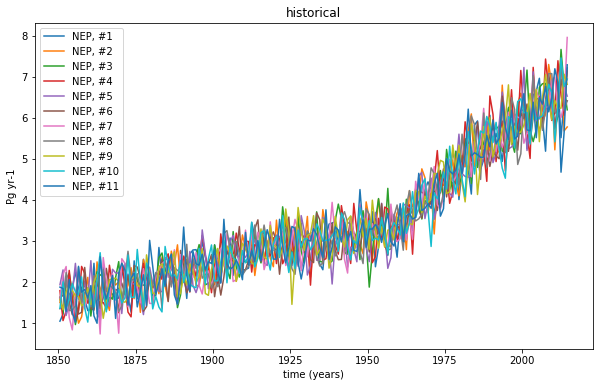

In [16]:
plot_1ds(ds_expr_ann, ['NEP'], title=experiment, region_val='Global')
ds_expr_ann['NEP'].sel(region='Global').isel(time=-1).values

array([559.298  , 558.5129 , 562.1382 , 562.6217 , 556.93555, 554.67865,
       560.62305, 559.6653 , 561.1348 , 556.1552 , 560.0487 ],
      dtype=float32)

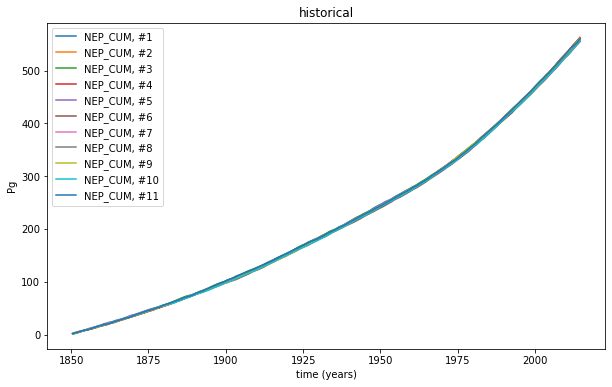

In [17]:
plot_1ds(ds_expr_ann, ['NEP_CUM'], title=experiment, region_val='Global')
ds_expr_ann['NEP_CUM'].sel(region='Global').isel(time=-1).values

array([281.7137 , 280.92868, 284.55377, 285.03754, 279.35126, 277.09442,
       283.03876, 282.0809 , 283.5507 , 278.57108, 282.46457],
      dtype=float32)

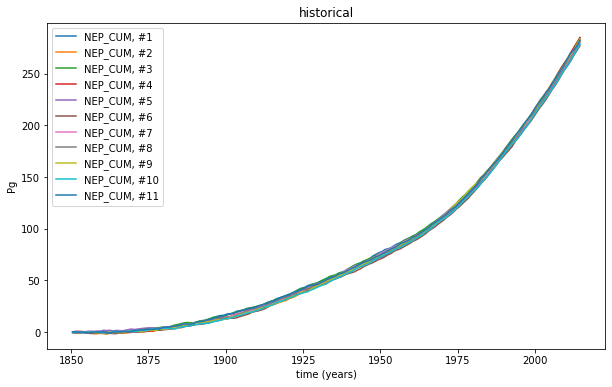

In [18]:
plot_1ds(ds_expr_ann_detrended, ['NEP_CUM'], title=experiment, region_val='Global')
ds_expr_ann_detrended['NEP_CUM'].sel(region='Global').isel(time=-1).values